# Regressão Linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
data = np.loadtxt("../data/age_data_1.txt")
display.display(data)

array([[ 1.24,  8.  ],
       [ 1.3 , 17.  ],
       [ 1.15,  8.  ],
       [ 1.51, 19.  ],
       [ 1.44, 17.  ],
       [ 0.62,  1.  ],
       [ 0.88,  7.  ],
       [ 1.03,  6.  ],
       [ 0.64,  2.  ],
       [ 1.27, 14.  ],
       [ 0.62,  1.  ],
       [ 0.52,  0.  ],
       [ 1.22, 11.  ],
       [ 0.82,  6.  ],
       [ 1.67, 14.  ],
       [ 1.28, 10.  ],
       [ 1.29, 11.  ],
       [ 1.63, 14.  ],
       [ 0.84,  6.  ],
       [ 1.3 ,  9.  ],
       [ 1.19,  6.  ],
       [ 1.67, 14.  ],
       [ 0.8 ,  7.  ],
       [ 0.79,  3.  ],
       [ 0.69,  1.  ],
       [ 0.67,  2.  ],
       [ 0.86,  8.  ],
       [ 1.36,  8.  ],
       [ 0.85,  3.  ],
       [ 1.63, 12.  ],
       [ 0.52,  0.  ],
       [ 1.  ,  5.  ],
       [ 0.96,  7.  ],
       [ 1.34, 16.  ],
       [ 0.93,  6.  ],
       [ 1.5 ,  9.  ],
       [ 0.74,  2.  ],
       [ 0.72,  4.  ],
       [ 1.06,  6.  ],
       [ 0.52,  0.  ],
       [ 1.05, 12.  ],
       [ 0.67,  4.  ],
       [ 1.36,  9.  ],
       [ 0.

Text(0, 0.5, 'Age')

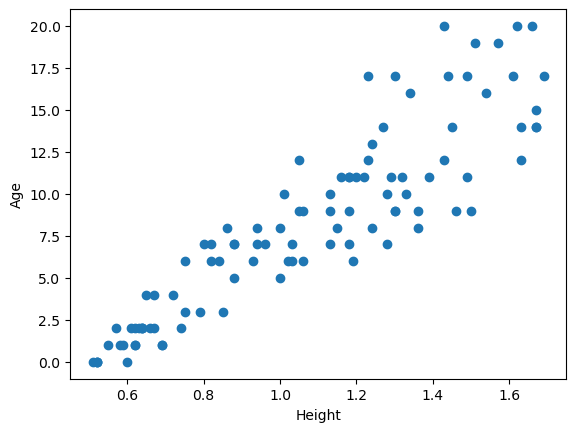

In [3]:
x, y = data.T
plt.scatter(x, y)
plt.xlabel('Height')
plt.ylabel('Age')

A ideia geral deste problema é de chegar a um resultado próximo da formula a seguir

$y = ax+b$

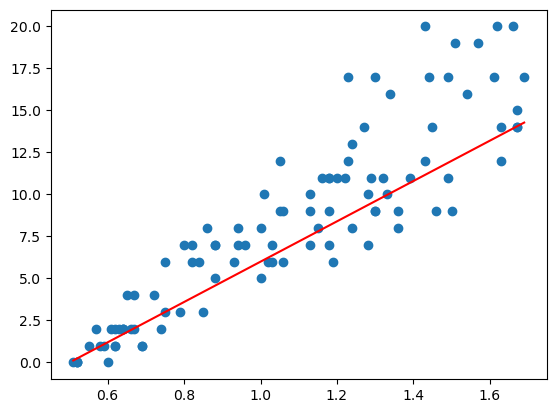

In [4]:
class Model:

    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __call__(self, x):
        y = self.a*x + self.b
        return y
    def copy(self):
        return Model(self.a, self.b)

model = Model(a=12, b=-6)
xm = np.linspace(x.min(), x.max())
ym = model(xm)

plt.scatter(x, y)
plt.plot(xm, ym, 'r')

### Erro quadradico médio

$$
\frac{1}{n}\sum_{i=1}^{n}({y(i)-y_m(i)})²
$$

In [5]:
def mse(model, x, y):
    ym = model(x)
    error = np.mean((y-ym)**2)
    return error

mse(model, x, y)

8.027488

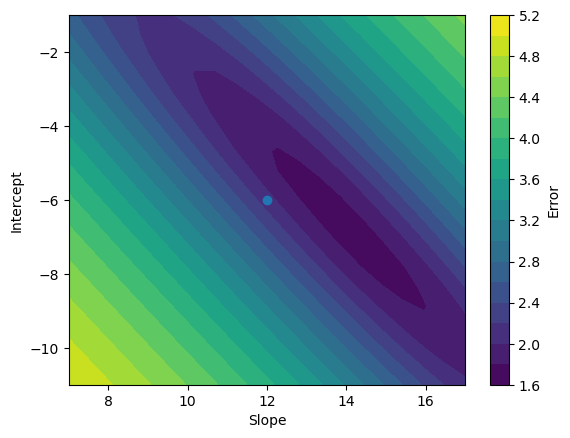

In [6]:
def get_local_error(model, x, y, par_range):
    # Numero de pontos usados na visualização
    size = 20
    a, b = model.a, model.b
    
    # Cria valores possivel dos parametros a e b
    a_vals = np.linspace(a-par_range, a+par_range, size)
    b_vals = np.linspace(b-par_range, b+par_range, size)
    
    error_grid = np.zeros((size, size))
    for i, b_val in enumerate(b_vals):
        for j, a_val in enumerate(a_vals):
            model_close = Model(a_val, b_val)
            error = mse(model_close, x, y)
            error_grid[i, j]= error

    return error_grid, a_vals, b_vals
def plot_local_error(model, x, y, par_range=1.):
    error_grid, a_vals, b_vals = get_local_error(model, x, y, par_range)
    plt.figure()
    plt.contourf(a_vals, b_vals, np.log(error_grid), levels=20)

    cbar = plt.colorbar()
    cbar.set_label('Error')
    plt.scatter(model.a, model.b)
    plt.xlabel("Slope")
    plt.ylabel('Intercept')

plot_local_error(model, x, y, par_range=5)




$$
e = \frac{1}{n}\sum_{i=1}^{n}({y(i)-y_m(i)})²
$$


$$
e = \frac{1}{n}\sum_{i=1}^{n}({y(i)-ax(i) - b})²
$$


formula a seguir incompleta

$$
e = \frac{}{n}\sum_{i=1}^{n}({y(i)-ax(i) - b})²
$$

In [7]:
def mse_grad(model, x, y):
    # Supondo que o len de x == len y
    n=len(x)
    ym = model(x)
    grad_a = -2*np.sum((y-ym)*x)/n
    grad_b = -2*np.sum(y-ym)/n
    return grad_a, grad_b

grad = mse_grad(model, x, y)
grad

(-3.5049520000000007, -2.8271999999999995)

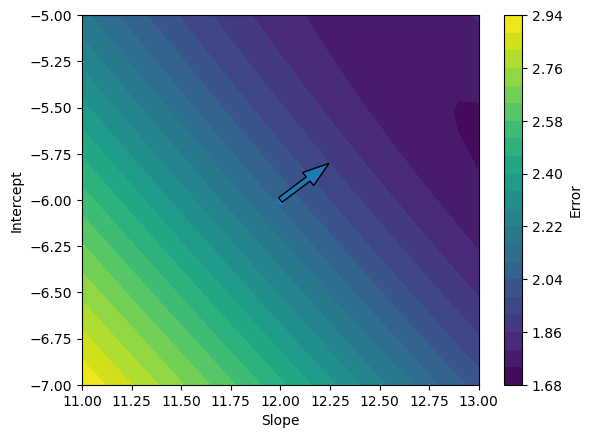

In [8]:
plot_local_error(model, x, y)
lr = 0.04
plt.arrow(model.a, model.b, -lr*grad[0], -lr*grad[1], width=0.03)

In [9]:
model_or = model.copy()

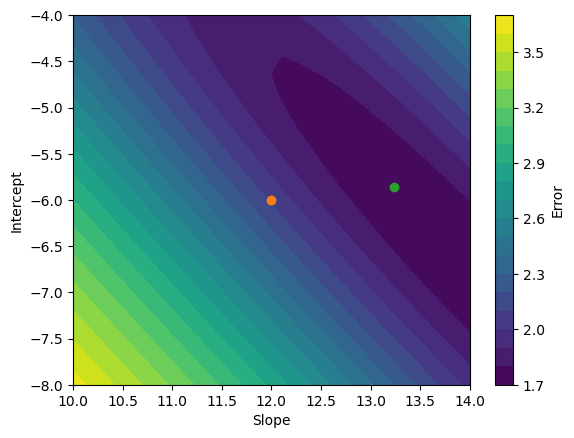

In [26]:
def step(model, x, y, lr):
    grad = mse_grad(model, x, y)
    model.a = model.a - lr*grad[0]
    model.b = model.b - lr*grad[1]

step(model, x, y, 0.25)
plot_local_error(model_or, x, y, par_range=2.)
plt.scatter(model_or.a, model_or.b)
plt.scatter(model.a, model.b)

### Loop de treinamento

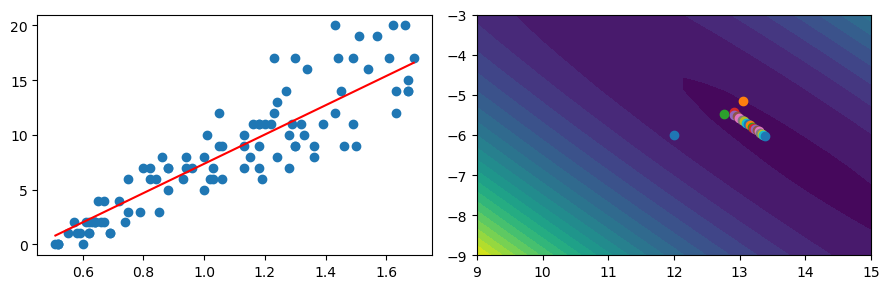

In [40]:
def plot_figure(model, x, y, fig=None):

    xm= np.linspace(x.min(), x.max())
    ym = model(xm)

    error_grid, a_vals, b_vals = get_local_error(model, x, y, par_range=3)
    
    if fig is None:
            
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

        ax1.scatter(x, y)
        ax1.plot(xm, ym, color='r')

        ax2.contourf(a_vals, b_vals, error_grid, levels = 20)
        ax2.scatter(model.a, model.b)
        plt.tight_layout()
        plt.close()
    else:
        ax1, ax2 = fig.axes
        ax1.lines[0].set_data(xm, ym)
        ax2.scatter(model.a, model.b)
    display.clear_output(wait=True)
    display.display(fig)
    return fig

def train(model, x, y, lr, num_epochs):
    fig = plot_figure(model, x, y)
    for epoch in range(num_epochs):
        print(mse(model, x, y))

        step(model, x, y, lr)
        plot_figure(model, x, y, fig)

        
model = Model(a=12, b=-6)
num_epochs=20
lr=0.3
train(model, x, y, lr, num_epochs)
